## Statistical Testing

Will be performing the One way ANOVA test because we are comparing the sample means of more than 3 groups. We need to check that the samples meet the assumptions of the test. The assumptions are that they have equal variances and have a normal distribution. 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import kruskal

In [60]:
#import the datasets
vegan = pd.read_csv('vegan_impacts.csv')
vegetarian = pd.read_csv('vegetarian_impacts.csv')
beef = pd.read_csv('beef_impacts.csv')
chicken = pd.read_csv('chicken_impacts.csv')

## Testing the assumtion of normality

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([25, 29, 33, 38, 38, 40, 42, 43, 48, 51])),
 (8.696942832769212, 38.7, 0.9904068965373636))

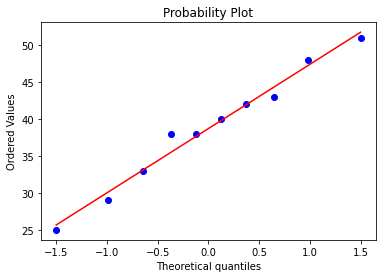

In [61]:
#Visual test of normality
stats.probplot(beef['land'], plot=plt)

In [62]:
impacts = ['land', 'water', 'global_warming', 'protein']

for item in impacts:
    print(stats.shapiro(vegan[item]))
    

ShapiroResult(statistic=0.7151870727539062, pvalue=0.0013462729984894395)
ShapiroResult(statistic=0.8369253873825073, pvalue=0.04053288325667381)
ShapiroResult(statistic=0.9414929151535034, pvalue=0.5697427988052368)
ShapiroResult(statistic=0.9502028822898865, pvalue=0.6709014177322388)


In [63]:
impacts = ['land', 'water', 'global_warming', 'protein']

for item in impacts:
    print(stats.shapiro(vegetarian[item]))

ShapiroResult(statistic=0.9541471004486084, pvalue=0.7176300287246704)
ShapiroResult(statistic=0.6352478861808777, pvalue=0.00014595566608477384)
ShapiroResult(statistic=0.9574443697929382, pvalue=0.7563861012458801)
ShapiroResult(statistic=0.8872711658477783, pvalue=0.15795786678791046)


In [64]:
impacts = ['land', 'water', 'global_warming', 'protein']

for item in impacts:
    print(stats.shapiro(beef[item]))

ShapiroResult(statistic=0.9764467477798462, pvalue=0.9433614611625671)
ShapiroResult(statistic=0.9189916253089905, pvalue=0.34862154722213745)
ShapiroResult(statistic=0.9434554576873779, pvalue=0.592063307762146)
ShapiroResult(statistic=0.9598194360733032, pvalue=0.7838115692138672)


In [65]:
impacts = ['land', 'water', 'global_warming', 'protein']

for item in impacts:
    print(stats.shapiro(chicken[item]))

ShapiroResult(statistic=0.75389564037323, pvalue=0.003980645909905434)
ShapiroResult(statistic=0.9733883738517761, pvalue=0.9203604459762573)
ShapiroResult(statistic=0.7306182384490967, pvalue=0.002073157113045454)
ShapiroResult(statistic=0.8777351975440979, pvalue=0.12289445847272873)


## Testing the assumtion of equal variance

***Equal variance for Beef***

In [66]:
impacts = ['land', 'water', 'global_warming', 'protein']

for item in impacts:
    var = np.var(beef[item])
    print(var)

58.40999999999999
70.05
60.55999999999999
556.41


***Equal variance for chicken***

In [67]:
impacts = ['land', 'water', 'global_warming', 'protein']

for item in impacts:
    var = np.var(chicken[item])
    print(var)

49.81
23.09
12.24
420.2900000000001


***Equal variance for vegan***

In [68]:
impacts = ['land', 'water', 'global_warming', 'protein']

for item in impacts:
    var = np.var(vegan[item])
    print(var)

4.89
49.83999999999999
5.16
139.60999999999999


***Equal variance for vegetarian***

In [69]:
impacts = ['land', 'water', 'global_warming', 'protein']

for item in impacts:
    var = np.var(vegetarian[item])
    print(var)

6.159999999999999
28.410000000000004
14.840000000000003
119.45


Because the samples are showing to have different variances and do not follow the normal distribution we cannot use the ANOVA one way test. Instead we need to use the non-parametric version of this test: The Kruskal Wallis H Test. This test is a rank-based and can be used to determine if there are statistically significant differences between two or more groups of an independent variable on a continuous or ordinal dependent variable.

## Performing the Kruskal-Wallis H Test

The Kruskal-Wallis test is a nonparametric version of the one-way analysis of variance test or ANOVA for short. This test determines whether more than two independent samples have different distributions. 

The null hypothesis is that all data samples are drawn from the same distribution. Specifically, that the population medians of all groups are equal. A rejection of the null hypothesis indicates that there is enough evidence to suggest that one or more samples dominate another sample, but the test does not indicate which samples or by how much.

## Land

### Kruskal Wallis Test

In [70]:
stat, p = kruskal(vegan['land'], vegetarian['land'], beef['land'], chicken['land'])

In [71]:
print('Statistics=%.3f, p=%.9f' % (stat, p))

Statistics=34.781, p=0.000000135


### Interpret Test

In [72]:
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Different distributions (reject H0)


From the above test we can see that the results show the distributions of the different diet types are not the same. Now we can use a post Hoc test to figure out which diet types are different from eachother.

### Post Hoc Dunn Test 

In [73]:
#Post Hoc Dunn Test
import scikit_posthocs as sp

df = vegan.append([vegetarian, beef, chicken], ignore_index=True)

sp.posthoc_dunn(df, 'land', 'diet_type', 'bonferroni')

,beef,chicken,vegan,vegetarian
beef,1.000000e+00,0.753375,2.605584e-07,0.001221
chicken,7.533752e-01,1.000000,4.798366e-04,0.174273
vegan,2.605584e-07,0.000480,1.000000e+00,0.468808
vegetarian,1.220640e-03,0.174273,4.688081e-01,1.000000


### Interpret Results

- Beef and Chicken: No significant difference
- Beef and Vegan: Very significant difference
- Beef and Vegetarian: Significant difference
- Vegan and Vegetarian: No significant difference
- Chicken and Vegan: Significant Difference
- Chicken and Vegetarian: No significant difference

## Water

### Kruskal Wallis Test

In [74]:
stat, p = kruskal(vegan['water'], vegetarian['water'], beef['water'], chicken['water'])

In [75]:
print('Statistics=%.3f, p=%.9f' % (stat, p))

Statistics=26.629, p=0.000007042


### Interpret Test

In [76]:
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Different distributions (reject H0)


From the above test we can see that the results show the distributions of the different diet types are not the same. Now we can use a post Hoc test to figure out which diet types are different from eachother.

### Post Hoc Dunn Test 

In [77]:
#Post Hoc Dunn Test
import scikit_posthocs as sp

df = vegan.append([vegetarian, beef, chicken], ignore_index=True)

sp.posthoc_dunn(df, 'water', 'diet_type', 'bonferroni')

,beef,chicken,vegan,vegetarian
beef,1.000000,0.105544,0.000034,0.000099
chicken,0.105544,1.000000,0.183009,0.318854
vegan,0.000034,0.183009,1.000000,1.000000
vegetarian,0.000099,0.318854,1.000000,1.000000


### Interpret Results

- Beef and Chicken: No significant difference
- Beef and Vegan: Very significant difference
- Beef and Vegetarian: Significant difference
- Vegan and Vegetarian: No significant difference
- Chicken and Vegan: No significant Difference
- Chicken and Vegetarian: No significant difference

## Protein

### Kruskal Wallis Test

In [78]:
stat, p = kruskal(vegan['protein'], vegetarian['protein'], beef['protein'], chicken['protein'])

In [79]:
print('Statistics=%.3f, p=%.9f' % (stat, p))

Statistics=27.855, p=0.000003895


### Interpret Test

In [80]:
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Different distributions (reject H0)


From the above test we can see that the results show the distributions of the different diet types are not the same. Now we can use a post Hoc test to figure out which diet types are different from eachother.

### Post Hoc Dunn Test 

In [81]:
#Post Hoc Dunn Test
import scikit_posthocs as sp

df = vegan.append([vegetarian, beef, chicken], ignore_index=True)

sp.posthoc_dunn(df, 'protein', 'diet_type', 'bonferroni')

,beef,chicken,vegan,vegetarian
beef,1.000000,1.000000,0.004869,0.037259
chicken,1.000000,1.000000,0.000041,0.000615
vegan,0.004869,0.000041,1.000000,1.000000
vegetarian,0.037259,0.000615,1.000000,1.000000


### Interpret Results

- Beef and Chicken: No significant difference
- Beef and Vegan: significant difference
- Beef and Vegetarian: Significant difference
- Vegan and Vegetarian: No significant difference
- Chicken and Vegan: Significant Difference
- Chicken and Vegetarian: Significant difference

## Global Warming

### Kruskal Wallis Test

In [82]:
stat, p = kruskal(vegan['global_warming'], vegetarian['global_warming'], beef['global_warming'], chicken['global_warming'])

In [83]:
print('Statistics=%.3f, p=%.9f' % (stat, p))

Statistics=29.341, p=0.000001899


### Interpret Test

In [84]:
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Different distributions (reject H0)


From the above test we can see that the results show the distributions of the different diet types are not the same. Now we can use a post Hoc test to figure out which diet types are different from eachother.

In [85]:
#Post Hoc Dunn Test
import scikit_posthocs as sp

df = vegan.append([vegetarian, beef, chicken], ignore_index=True)

sp.posthoc_dunn(df, 'global_warming', 'diet_type', 'bonferroni')

,beef,chicken,vegan,vegetarian
beef,1.000000e+00,0.008776,4.312831e-07,0.020154
chicken,8.775559e-03,1.000000,1.649769e-01,1.000000
vegan,4.312831e-07,0.164977,1.000000e+00,0.084862
vegetarian,2.015445e-02,1.000000,8.486190e-02,1.000000


- Beef and Chicken: Significant difference
- Beef and Vegan: Significant difference
- Beef and Vegetarian: Significant difference
- Vegan and Vegetarian: No significant difference
- Chicken and Vegan: No Significant Difference
- Chicken and Vegetarian: No Significant difference

### Below is the code for parametric testing (If there was equal variance and normality)

## Performing the ANOVA test

***Null Hypothesis***: Mean land impacts across the different diet types are the same

***Alternative hypothesis***: At least one of the means differ

In [61]:
#List of the different impacts
impacts = ['land', 'water', 'global_warming', 'protein']

#Perform ANOVA test for each impact type
for item in impacts:
    print(item,":",stats.f_oneway(beef[item], vegan[item], vegetarian[item], chicken[item]))
    

land : F_onewayResult(statistic=68.13121489058435, pvalue=6.494984644888813e-15)
water : F_onewayResult(statistic=44.84561526343429, pvalue=3.028523564023994e-12)
global_warming : F_onewayResult(statistic=86.92112068965527, pvalue=1.4877249438682544e-16)
protein : F_onewayResult(statistic=26.416294426102144, pvalue=3.2865602587302345e-09)


The result of this test is that we have enough evidence to reject the null hypothesis that there is no difference between the means of the two samples, this is because the p value for all four impacts is significant.

## Post Hoc tests to figure out where the differences are 

## Land

In [75]:
print("Beef Vegan",":", stats.ttest_ind(a=beef['land'], b=vegan['land'], equal_var = False))
print("Beef Vegetarian",":",stats.ttest_ind(a=beef['land'], b=vegetarian['land'], equal_var = False))
print("Beef Chicken",":",stats.ttest_ind(a=beef['land'], b=chicken['land'], equal_var = False))
print("Chicken Vegan",":",stats.ttest_ind(a=chicken['land'], b=vegan['land'], equal_var = False))
print("chicken Vegetarian",":",stats.ttest_ind(a=chicken['land'], b=vegetarian['land'], equal_var = False))
print("Vegan Vegetarian",":",stats.ttest_ind(a=vegan['land'], b=vegetarian['land'], equal_var = False))

Beef Vegan : Ttest_indResult(statistic=12.744890250141493, pvalue=1.0146088207388554e-07)
Beef Vegetarian : Ttest_indResult(statistic=10.266881639673578, pvalue=6.239701182950977e-07)
Beef Chicken : Ttest_indResult(statistic=4.0373418688669505, pvalue=0.0007814080453523354)
Chicken Vegan : Ttest_indResult(statistic=8.031428211874042, pvalue=7.269595504133281e-06)
chicken Vegetarian : Ttest_indResult(statistic=5.4134903850481155, pvalue=0.00019979468778821686)
Vegan Vegetarian : Ttest_indResult(statistic=-5.685657115283965, pvalue=2.2688890498798954e-05)


For the test above, we can see that all of the diet types are different from each other with significant p values. The most significantly different diet types are beef and vegan, and beef and vegetarian. Using unadjusted  pairwise t-tests can overestimate significance, however, because the more comparisons you make, the more likely you are to come across an unlikely result due to chance. We can adjust for this multiple comparison problem by dividing the statistical significance level by the number of comparisons made. So 0.05 becomes 0.05/6= 0.0083. Even with this they are still all significant.

### Using Tukeys significance test

Tukey's range test, also known as Tukey's test, Tukey method, Tukey's honest significance test, or Tukey's HSD test, is a single-step multiple comparison procedure and statistical test. It can be used to find means that are significantly different from each other.

In [79]:
df = vegan.append([vegetarian, beef, chicken], ignore_index=True)

group1,group2,meandiff,p-adj,lower,upper,reject
beef,chicken,-14.0,0.001,-20.9328,-7.0672,True
beef,vegan,-33.8,0.001,-40.7328,-26.8672,True
beef,vegetarian,-27.5,0.001,-34.4328,-20.5672,True
chicken,vegan,-19.8,0.001,-26.7328,-12.8672,True
chicken,vegetarian,-13.5,0.001,-20.4328,-6.5672,True
vegan,vegetarian,6.3,0.0862,-0.6328,13.2328,False


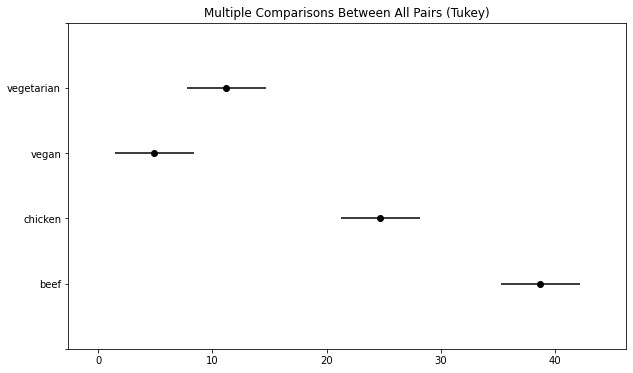

In [89]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = df["land"],
                         groups = df["diet_type"],
                         alpha = 0.05)

tukey.plot_simultaneous()

tukey.summary()

The lines in the above plot show the confidence intervals for the mean for each diet type. For Land Use all diet types are significantly different from eachother except for vegan and vegetarian.

## Water

group1,group2,meandiff,p-adj,lower,upper,reject
beef,chicken,-23.4,0.001,-31.7106,-15.0894,True
beef,vegan,-30.9,0.001,-39.2106,-22.5894,True
beef,vegetarian,-30.8,0.001,-39.1106,-22.4894,True
chicken,vegan,-7.5,0.0892,-15.8106,0.8106,False
chicken,vegetarian,-7.4,0.0956,-15.7106,0.9106,False
vegan,vegetarian,0.1,0.9,-8.2106,8.4106,False


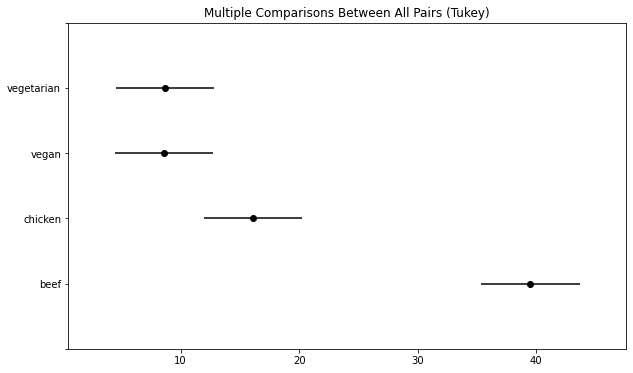

In [90]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = df["water"],
                         groups = df["diet_type"],
                         alpha = 0.05)

tukey.plot_simultaneous()

tukey.summary()

For water use, only beef is significantly different from vegan, vegetarian and chicken diets.

## Global Warming

group1,group2,meandiff,p-adj,lower,upper,reject
beef,chicken,-27.8,0.001,-33.9153,-21.6847,True
beef,vegan,-33.0,0.001,-39.1153,-26.8847,True
beef,vegetarian,-27.8,0.001,-33.9153,-21.6847,True
chicken,vegan,-5.2,0.1195,-11.3153,0.9153,False
chicken,vegetarian,0.0,0.9,-6.1153,6.1153,False
vegan,vegetarian,5.2,0.1195,-0.9153,11.3153,False


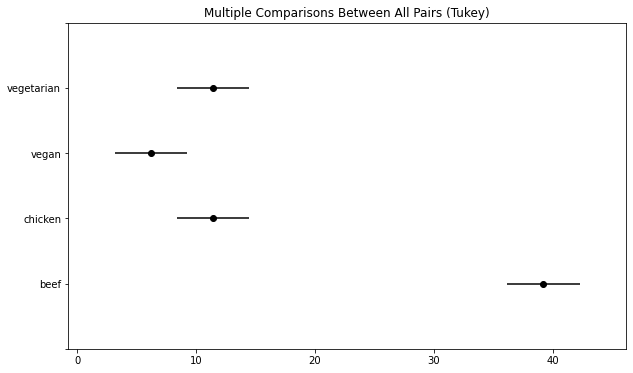

In [91]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = df["global_warming"],
                         groups = df["diet_type"],
                         alpha = 0.05)

tukey.plot_simultaneous()

tukey.summary()

For global warming, only beef is significantly different from vegan, vegetarian and chicken diets.

## Protein

group1,group2,meandiff,p-adj,lower,upper,reject
beef,chicken,22.4,0.0489,0.0844,44.7156,True
beef,vegan,-41.4,0.001,-63.7156,-19.0844,True
beef,vegetarian,-35.2,0.001,-57.5156,-12.8844,True
chicken,vegan,-63.8,0.001,-86.1156,-41.4844,True
chicken,vegetarian,-57.6,0.001,-79.9156,-35.2844,True
vegan,vegetarian,6.2,0.8667,-16.1156,28.5156,False


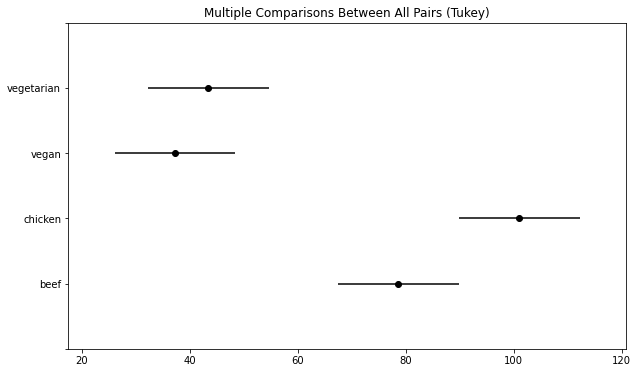

In [92]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = df["protein"],
                         groups = df["diet_type"],
                         alpha = 0.05)

tukey.plot_simultaneous()

tukey.summary()

For protein efficiency, all diet types are significantly different from eachother apart from vegan and vegetarian diets.

### How much of a difference will changing your diet help with your impacts? 

- Meatless mondays (beef/chicken 6 days a week, vegetarian one day a week)
- Meatless mondays (beef/chicken 6 days a week, vegan one day a week)
- Vegan 5 days a week then chicken and beef at the weekend 
- Vegetarian 5 days a week then chicken and beef at the weekend